# Classic PINN

## Training

In [1]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join("..", "")))

import torch
from src.data_generator.diffusion_equations import DiffusionEquationDataset
from src.train.train import train
from src.figures.figures import plot_sample
from src.models.basic import alpha_network, u_network
from src.loss_function.loss_function import Loss


# For PyTorch random
torch.manual_seed(45)

# Create Dataset
dataset = DiffusionEquationDataset(n_samples=1, nx=100, nt=100,T=100, L=1)

# Define PINNS
alpha_net = alpha_network()
u_net = u_network()

# training
u_net.train()
alpha_net.train()

lr = 1e-2
optimizer = torch.optim.Adam(list(u_net.parameters()) + list(alpha_net.parameters()), lr=lr)
loss = Loss()
train(
    loss_function=loss,
    optimizer=optimizer,
    dataset=dataset,
    u_net=u_net,
    alpha_net=alpha_net,
    epochs=3000
)


Epoch 0: Loss = 1.6470e-01
Epoch 20: Loss = 7.3766e-02
Epoch 40: Loss = 6.5143e-02
Epoch 60: Loss = 5.6181e-02
Epoch 80: Loss = 4.5721e-02
Epoch 100: Loss = 3.6378e-02
Epoch 120: Loss = 2.8595e-02
Epoch 140: Loss = 2.2452e-02
Epoch 160: Loss = 1.7704e-02
Epoch 180: Loss = 1.4389e-02
Epoch 200: Loss = 1.2266e-02
Epoch 220: Loss = 1.0909e-02
Epoch 240: Loss = 9.4646e-03
Epoch 260: Loss = 8.8885e-03
Epoch 280: Loss = 8.2669e-03
Epoch 300: Loss = 7.4928e-03
Epoch 320: Loss = 1.0362e-02
Epoch 340: Loss = 7.1159e-03
Epoch 360: Loss = 6.5377e-03
Epoch 380: Loss = 5.7436e-03
Epoch 400: Loss = 5.0078e-03
Epoch 420: Loss = 4.5530e-03
Epoch 440: Loss = 4.0404e-03
Epoch 460: Loss = 3.6979e-03
Epoch 480: Loss = 3.5096e-03
Epoch 500: Loss = 3.2691e-03
Epoch 520: Loss = 3.0164e-03
Epoch 540: Loss = 2.8420e-03
Epoch 560: Loss = 2.9134e-03
Epoch 580: Loss = 2.6002e-03
Epoch 600: Loss = 2.4290e-03
Epoch 620: Loss = 4.7791e-03
Epoch 640: Loss = 2.3389e-03
Epoch 660: Loss = 2.1535e-03
Epoch 680: Loss = 2.

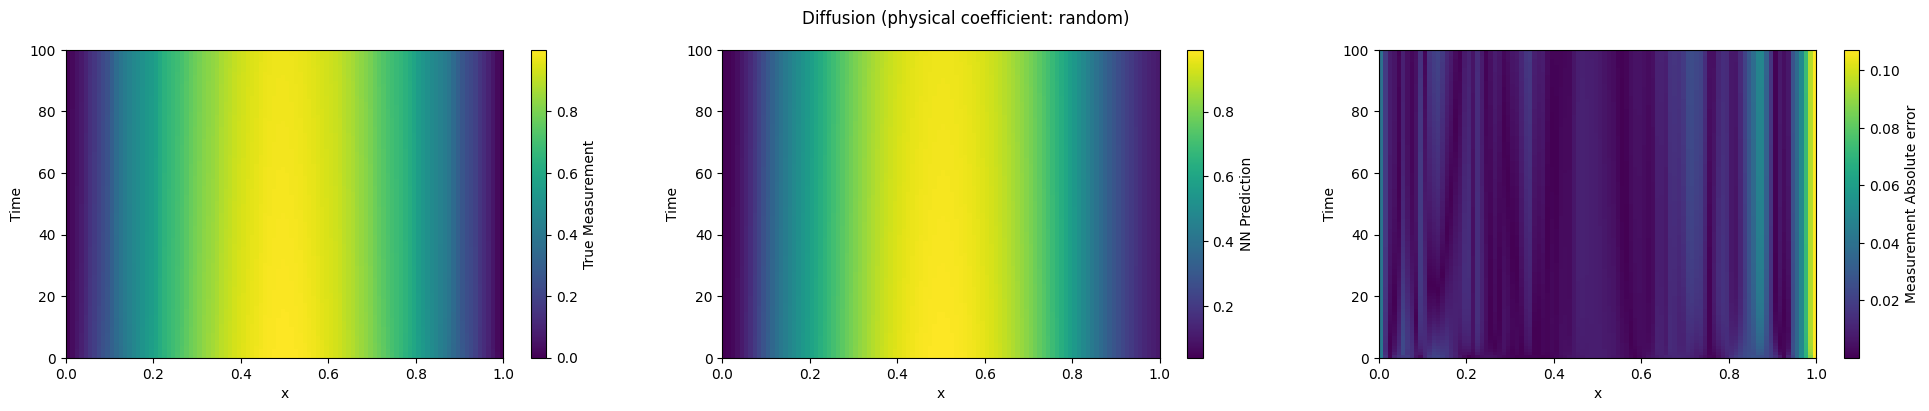

In [2]:
# plot
u_net.eval()
alpha_net.eval()
sample = dataset[0]

u_xt = u_net(xt=sample['xt'])
plot_sample(sample, u_xt, xt_pred_mesh=sample)


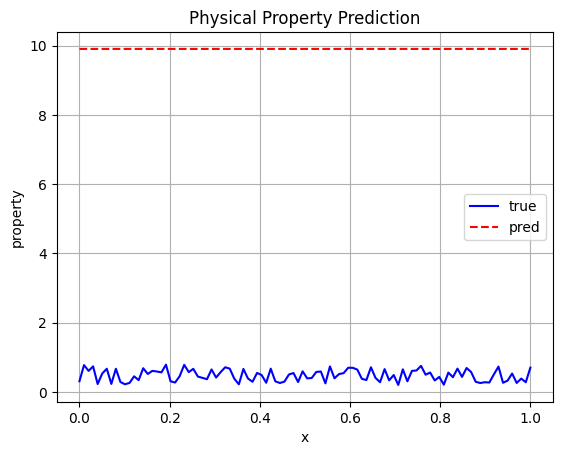

In [3]:
# from src.figures.figures import plot_physical_property
import matplotlib.pyplot as plt 


def plot_physical_property(x, property_true, property_pred):

    plt.plot(x, property_true, label="true", color='b')
    plt.xlabel("x")
    plt.ylabel("property")
    plt.plot(x, property_pred, label='pred', color='r', linestyle='--')
    plt.legend()
    plt.title("Physical Property Prediction")
    plt.grid()

    plt.show()

x = sample['x'].detach().numpy()[:,0]
property_pred = alpha_net(x=sample['x']).detach().numpy()[:,0]
property_true = sample["alpha"].detach().numpy()

plot_physical_property(x=x, property_pred=property_pred, property_true=property_true)

## Predict Out-Of-Domain

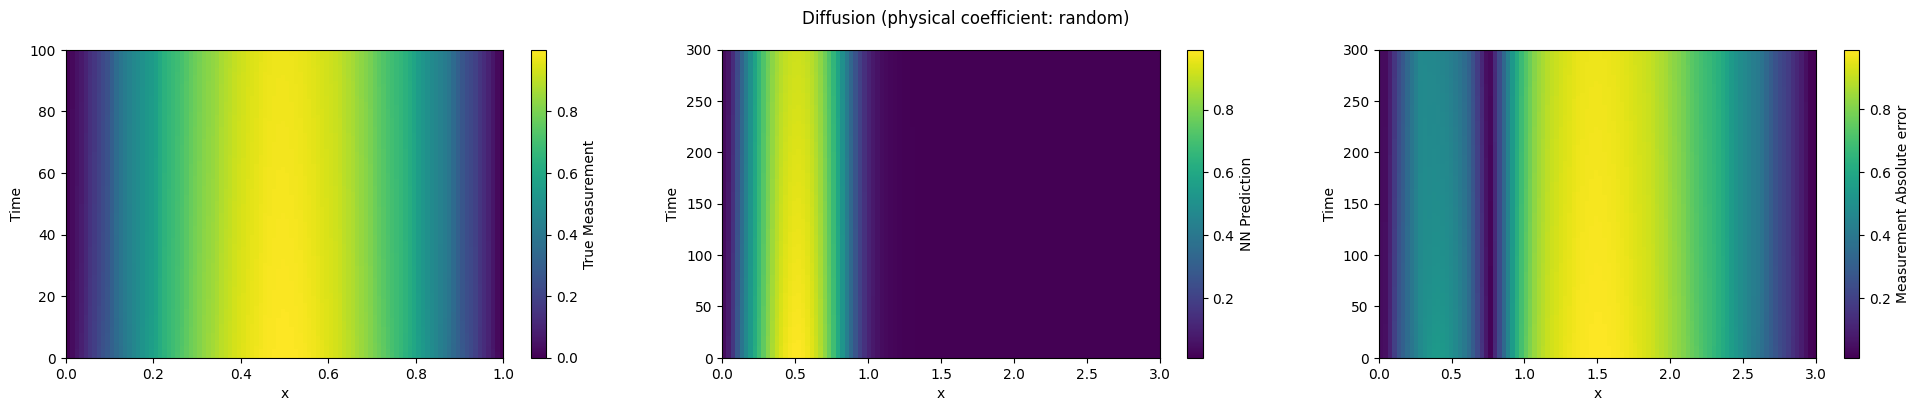

In [4]:
from src.data_generator.mesh_grid import generate_mesh_grid

alpha_x = sample['alpha']
out_of_domain_factor = 3
ood_mesh = generate_mesh_grid(
    alpha_x=sample['alpha'], 
    nx=sample['nx'], 
    nt=sample['nt'], 
    L=sample['L']*out_of_domain_factor, 
    T=sample['T']*out_of_domain_factor
)

u_xt_ood = u_net(xt=ood_mesh["xt"])
plot_sample(sample, u_xt_ood, ood_mesh)

# JEPA PINN

In [5]:
sample['dt']

5.8117838144833566e-05